# Description

`plotnine` tutorial from Real Python https://realpython.com/ggplot-python/

* reference
    * https://datascienceworkshops.com/blog/plotnine-grammar-of-graphics-for-python/
    * https://datascienceworkshops.com/blog/heuristics-for-translating-ggplot2-to-plotnine/
    * https://plotnine.readthedocs.io/en/stable/api.html#datasets
    * https://plotnine.readthedocs.io/en/stable/api.html#stats
    * https://plotnine.readthedocs.io/en/stable/api.html#scales
    * https://plotnine.readthedocs.io/en/stable/api.html#coordinates
    * https://plotnine.readthedocs.io/en/stable/api.html#facets

# Imports

In [1]:
from plotnine.data import economics

from plotnine import ggplot, aes, geom_line

# Economics data

In [2]:
economics

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.400,198712,12.500,4.500,2944
1,1967-08-01,510.500,198911,12.500,4.700,2945
2,1967-09-01,516.300,199113,11.700,4.600,2958
3,1967-10-01,512.900,199311,12.500,4.900,3143
4,1967-11-01,518.100,199498,12.500,4.700,3066
...,...,...,...,...,...,...
569,2014-12-01,"12,122.000",320201,5.000,12.600,8688
570,2015-01-01,"12,080.800",320367,5.500,13.400,8979
571,2015-02-01,"12,095.900",320534,5.700,13.100,8705
572,2015-03-01,"12,161.500",320707,5.200,12.200,8575


In [3]:
economics.dtypes

date        datetime64[ns]
pce                float64
pop                  int64
psavert            float64
uempmed            float64
unemploy             int64
dtype: object

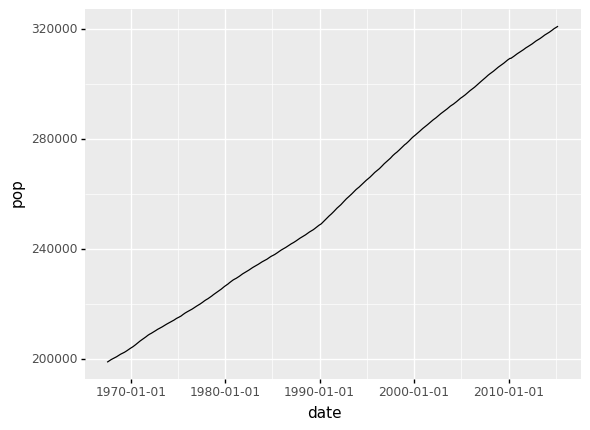

<ggplot: (8775722828605)>

In [4]:
(ggplot(economics)  # the data to use
 + aes(x='date', y='pop') # what variables to use
 + geom_line() # geometric object to use for drawing
    )

# Components

Required components

1. Data
2. Aesthetics (aes) 
    * provide a mapping between data variables and aesthetic, or graphical variables used by the drawing system
3. Geometric objects (geoms) define the type of geometric object to use in the drawing
    * e.g. points, lines, bars, others

Optional components

1. Statistical transformations: specify computations and aggregations to be applied to the data before plotting
2. Scales: apply some transformations during mapping from data to aesthetics
    * e.g. log scale
3. Facets: divide data into groups based on some attribute, then plot each group into a separate panel
4. Coordinate systems: map the position of objects to a 2D graphical location in the plot
5. Themes: control visual propertiles like colors, fonts and shapes

# Plotting Data using Python and `ggplot`

## Data

Create a `ggplot` object and pass the dataset you want to the constructor

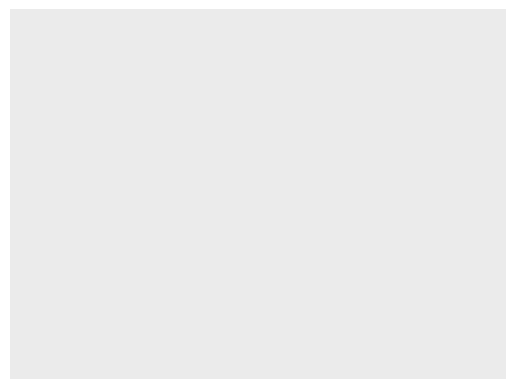

<ggplot: (8775722828637)>

In [5]:
from plotnine.data import mpg
from plotnine import ggplot

ggplot(mpg)

In [6]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.800,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.800,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.000,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.000,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.800,1999,6,auto(l5),f,16,26,p,compact


## Aesthetics: Define variables for each axis

* After specifying the data, next define the variable to use for each axis
* Aesthetic maps data variables to graphical attributes like 2D position and color

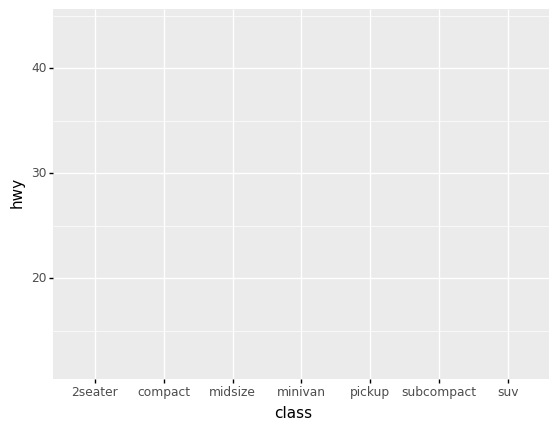

<ggplot: (8775723084561)>

In [7]:
from plotnine.data import mpg
from plotnine import ggplot, aes

ggplot(mpg) + aes(x='class', y='hwy')

## Geometric Objects: Choose different plot types

After defining data and attributes, specify the geometric object to tell plotnine how data points should be drawn

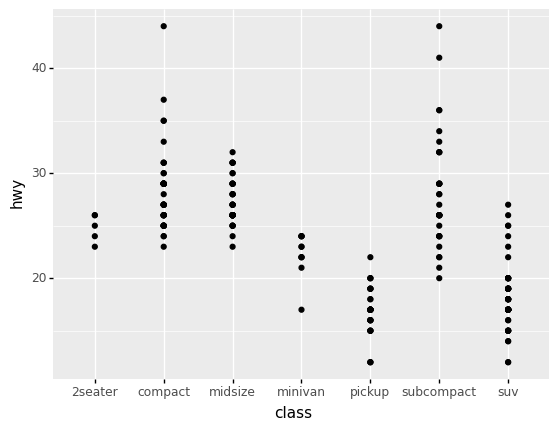

<ggplot: (8775723084765)>

In [8]:
from plotnine.data import mpg
from plotnine import ggplot, aes, geom_point

ggplot(mpg) + aes(x='class', y='hwy') + geom_point()

the generated data visualization has a point for each vehicle in the dataset

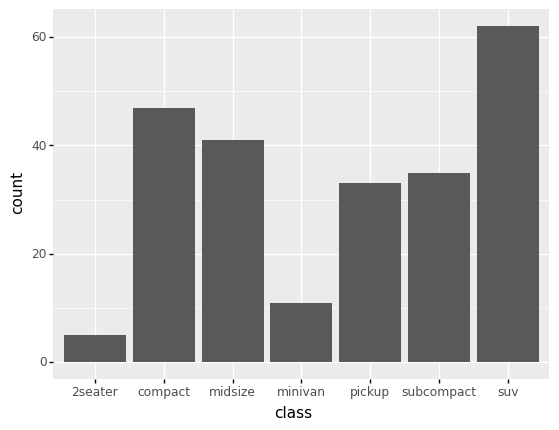

<ggplot: (8775723103169)>

In [9]:
from plotnine.data import mpg
from plotnine import ggplot, aes, geom_bar

ggplot(mpg) + aes(x='class') + geom_bar()

Here, `geom_bar()` sets the geometric object to bar. Since the code doesn’t specify any attribute for the y-axis, `geom_bar()` implicitly groups data points by the attribute used for the x-axis and then **uses the count of points** in each group for the y-axis.



# Using Additional Python and ggplot Features to Enhance Data Visualizations

In this section, you’re going to learn about the optional components that you can use when building data visualizations with plotnine. These components can be grouped into five categories:

1. Statistical transformations
2. Scales
3. Coordinates systems
4. Facets
5. Themes


## Statistical Transformations: Aggregate and Transform Your Data

transformations apply some computation to the data before plotting it, for example to display some statistical indicator instead of the raw data

# Histogram

Let’s say that you want to create a histogram to display the distributions of the levels of Lake Huron from 1875 to 1975. This dataset is included with plotnine. You can use the following code to inspect the dataset from Jupyter Notebook and learn about its format:

In [10]:
# Import our example dataset with the levels of Lake Huron 1875–1975
from plotnine.data import huron

huron.head()

,year,level,decade
0,1875,580.380,1870
1,1876,581.860,1870
2,1877,580.970,1870
3,1878,580.800,1870
4,1879,579.790,1870


Now you can build the histogram in two steps:

1. Group the `level` measurements into bins.
2. Display the number of measurements in each `bin` using a bar plot.


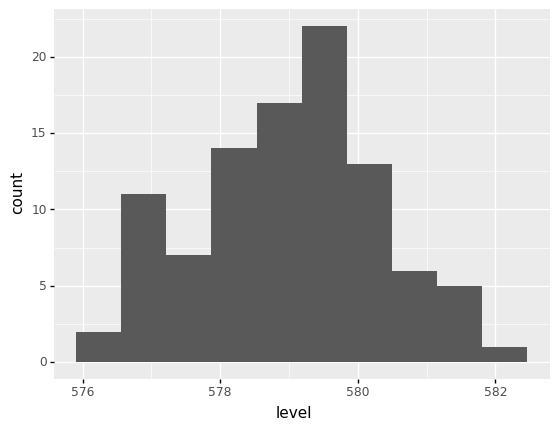

<ggplot: (8775723086725)>

In [11]:
from plotnine.data import huron
from plotnine import ggplot, aes, stat_bin, geom_bar

(ggplot(huron)
  + aes(x='level')
  + stat_bin(bins=10)  # divide `level` range into 10 equally sized bins
  + geom_bar())

## Alternate method using `geom_histogram`

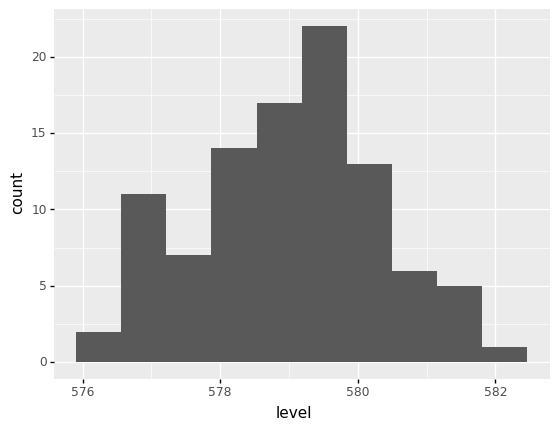

<ggplot: (8775723347749)>

In [12]:
from plotnine.data import huron
from plotnine import ggplot, aes, geom_histogram

ggplot(huron) + aes(x="level") + geom_histogram(bins=10)

`geom_histogram()` is like using `stats_bin()` and then `geom_bar()`

# Bar Chart

In [74]:
huron.head()

,year,level,decade
0,1875,580.380,1870
1,1876,581.860,1870
2,1877,580.970,1870
3,1878,580.800,1870
4,1879,579.790,1870


# Plot counts

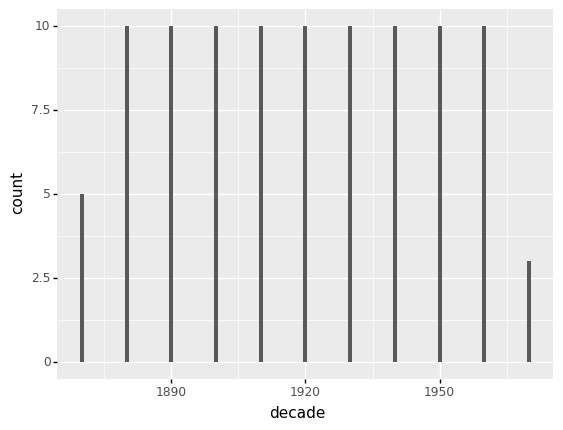

<ggplot: (8775723752321)>

In [15]:
ggplot(huron) + aes(x="decade") + geom_bar()

# Plot values

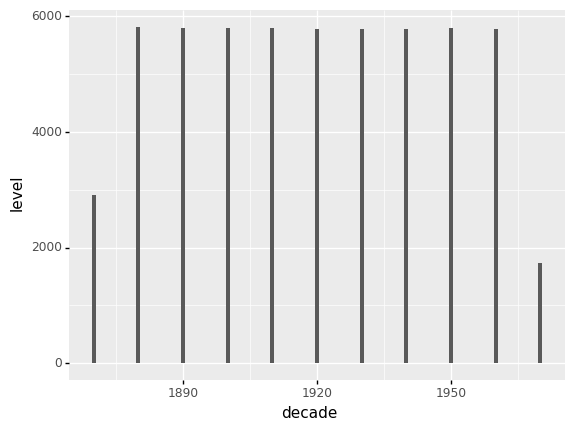

<ggplot: (8775723344353)>

In [17]:
ggplot(huron) + aes(x="decade", y='level') + geom_bar(stat='identity')

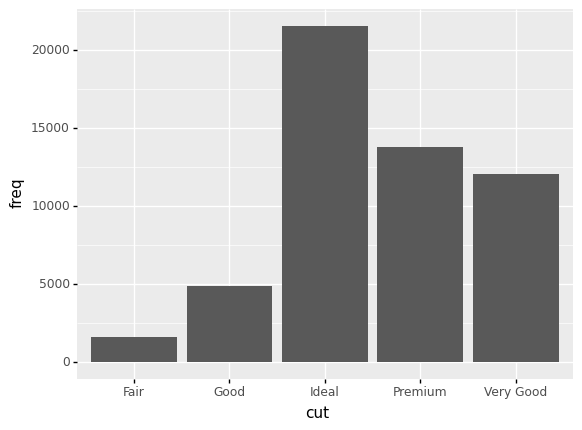

<ggplot: (8775723326357)>

In [18]:
demo = pd.DataFrame({"cut": ["Fair", "Good", "Very Good", "Premium", "Ideal"],
                     "freq": [1610, 4906, 12082, 13791, 21551]})

(ggplot(data=demo) 
 + geom_bar(mapping=aes(x="cut", y="freq"), stat="identity"))

# Box plot

1. Group the measurements by decade.
2. Create a box plot for each group.

You can do the first step using `factor()` in the aesthetics specification. `factor()` groups together all data points that share the same value for the specified attribute.



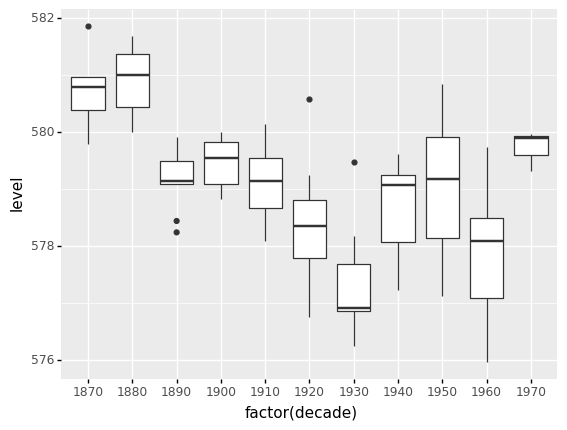

<ggplot: (8775717022537)>

In [19]:
from plotnine.data import huron
from plotnine import ggplot, aes, geom_boxplot

(ggplot(huron)
  + aes(x='factor(decade)', y='level')
  + geom_boxplot())

The code groups the data rows by decade using `factor()` and then uses `geom_boxplot()` to create the box plots.



Using `geom_boxplot()` implies `stat_boxplot()`

# Scales: Change Data Scale According to Its Meaning

Show elapsed years since 1970

`scale_x_timedelta()` transforms each point’s x-value by computing its difference from the oldest date in the dataset

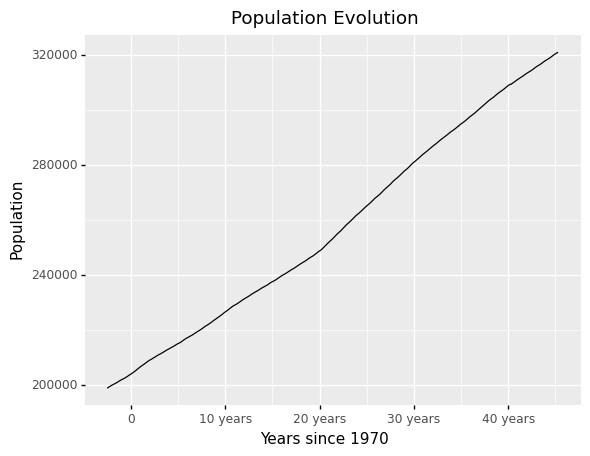

<ggplot: (8775723021217)>

In [20]:
from plotnine.data import economics
from plotnine import ggplot, aes, scale_x_timedelta, labs, geom_line

(
    ggplot(economics)
    + aes(x="date", y="pop")
    + scale_x_timedelta(name="Years since 1970")
    + labs(title="Population Evolution", y="Population")
    + geom_line()
)

# Coordinates Systems: Map Data Values to 2D Space

A coordinates system defines how data points are mapped to 2D graphical locations in the plot. You can think of it as a map from mathematical variables to graphical positions

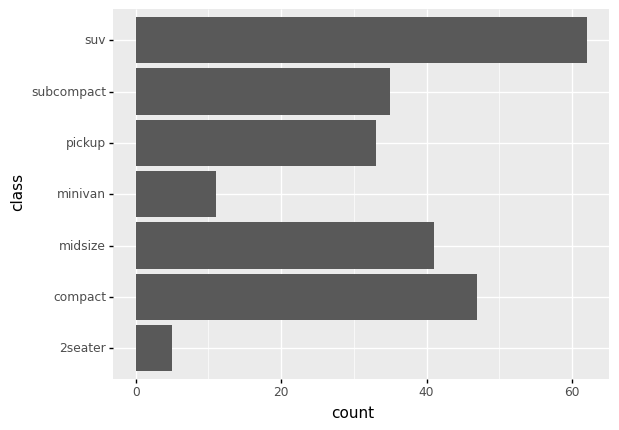

<ggplot: (8775724348261)>

In [21]:
from plotnine.data import mpg
from plotnine import ggplot, aes, geom_bar, coord_flip

(ggplot(mpg) 
 + aes(x="class") 
 + geom_bar() 
 + coord_flip()   # flip x- and y-axes
)

# Facets: Plot Subsets of Data Into Panels in the Same Plot

Facets allow you to group data by some attributes and then plot each group individually, but in the same image

For example, let’s say you want to take the fuel economy dataset (mpg) and build a plot showing the miles per gallon for each engine size (displacement) for each vehicle class for each year. In this case your plot needs to display information from four variables:

1. hwy: Miles per gallon
2. displ: Engine size
3. class: Vehicle class
4. year: Model year


There’s a two-step trick that you can use when faced with this problem:

1. Start by partitioning the data into groups where all data points in a group share the same values for some attributes.

2. Plot each group individually, showing only the attributes not used in the grouping.



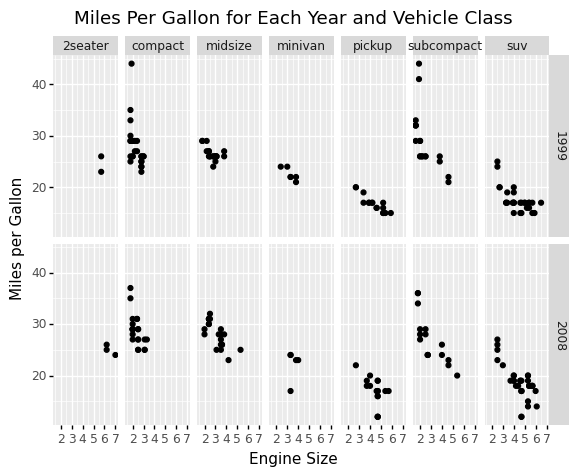

<ggplot: (8775724348301)>

In [22]:
from plotnine.data import mpg
from plotnine import ggplot, aes, facet_grid, labs, geom_point

(ggplot(mpg)
  + facet_grid(facets='year ~ class')   # facets y ~ x
  + aes(x='displ', y='hwy')             # what to plot in each facet
  + labs(
      x='Engine Size',
      y='Miles per Gallon',
      title='Miles Per Gallon for Each Year and Vehicle Class')
  + geom_point())

1. partitions data by year and vehicle class using `facet_grid()`, passing it the attributes to use for the partitioning with `facets="year~class"`
2. For each data partition, the plot is built using the components that you saw in previous sections, like aesthetics, geometric objects, and `labs()`

## Don't facet in row or column dimension (use `.`)

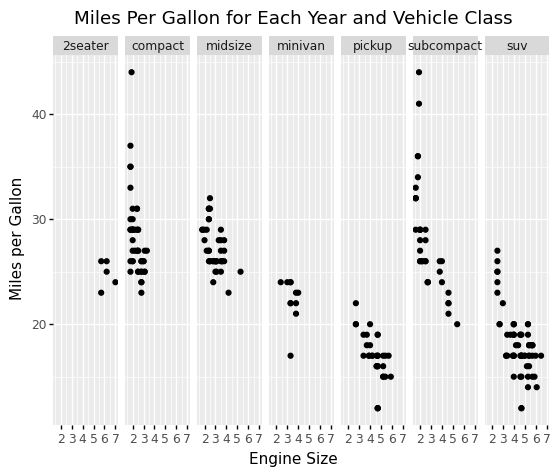

<ggplot: (8775723000069)>

In [23]:
from plotnine.data import mpg
from plotnine import ggplot, aes, facet_grid, labs, geom_point

(ggplot(mpg)
  + facet_grid(facets='. ~ class')   # facets y ~ x
  + aes(x='displ', y='hwy')             # what to plot in each facet
  + labs(
      x='Engine Size',
      y='Miles per Gallon',
      title='Miles Per Gallon for Each Year and Vehicle Class')
  + geom_point())

# `geom_smooth`

/Users/bartev/.venvs3/stratsync/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


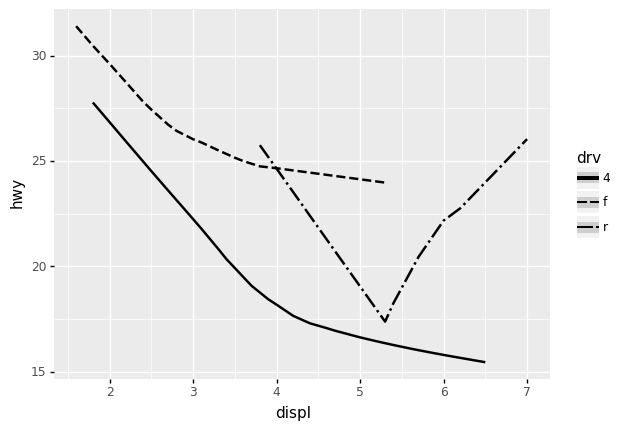

<ggplot: (8775723759637)>

In [24]:
from plotnine import geom_smooth

(ggplot(data=mpg)
    + geom_smooth(mapping=aes(x='displ', y='hwy', linetype='drv')))

/Users/bartev/.venvs3/stratsync/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


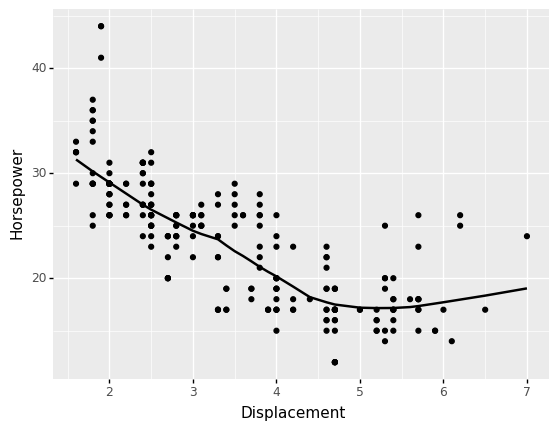

<ggplot: (8775723791449)>

In [25]:
from plotnine import geom_smooth, labs

(ggplot(data=mpg, mapping=aes(x='displ', y='hwy'))
    + geom_point()
    + geom_smooth(span=0.4)   # span controls the "wiggliness" of th e loess smoother
                              # span is fraction of points used to fit each local regression
    + labs(x='Displacement',
          y='Horsepower'))

# Different mappings in different layers

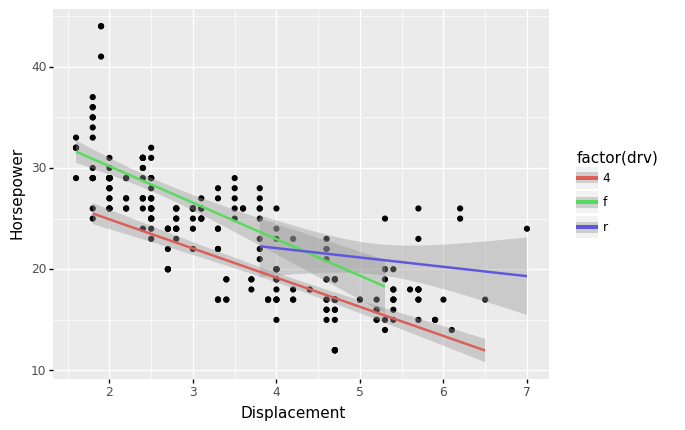

<ggplot: (8775725490941)>

In [26]:
from plotnine import geom_smooth, labs

(ggplot(data=mpg, mapping=aes(x='displ', y='hwy'))
    + geom_point()
    + geom_smooth(method='lm', mapping=aes(color='factor(drv)'))
    + labs(x='Displacement',
          y='Horsepower'))

# Different data in different layers

In [27]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.800,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.800,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.000,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.000,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.800,1999,6,auto(l5),f,16,26,p,compact


/Users/bartev/.venvs3/stratsync/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


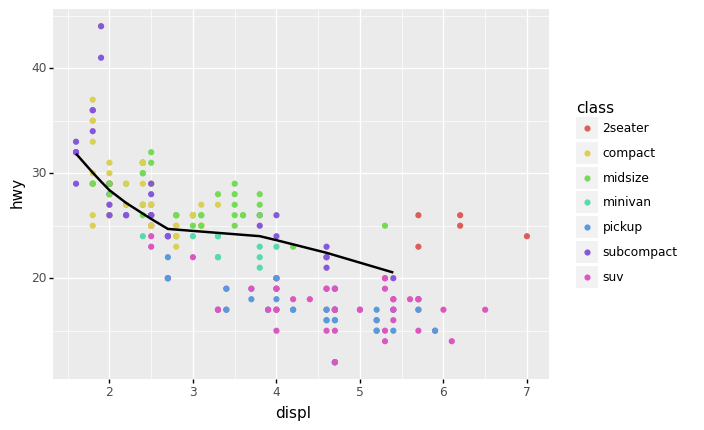

<ggplot: (8775723791529)>

In [28]:
from plotnine import geom_smooth, labs

(ggplot(data=mpg, mapping=aes(x='displ', y='hwy'))
    + geom_point(mapping=aes(color='class'))
    + geom_smooth(data=mpg.loc[mpg['class'] == 'subcompact'])
    )

# Themes: Improve the Look of Your Visualization

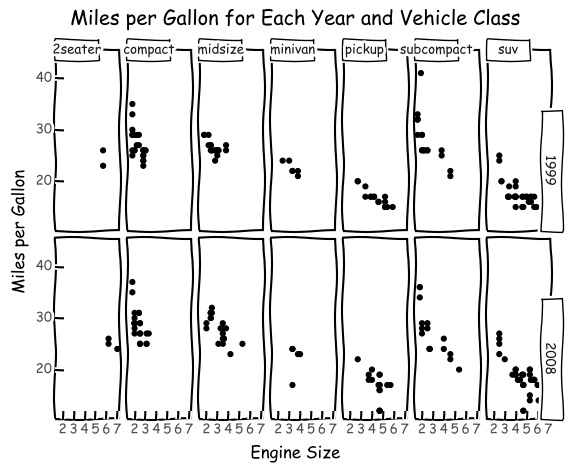

<ggplot: (8775725159797)>

In [29]:
from plotnine.data import mpg
from plotnine import ggplot, aes, facet_grid, labs, geom_point, theme_xkcd

(
    ggplot(mpg)
    + facet_grid(facets="year~class")
    + aes(x="displ", y="hwy")
    + labs(
        x="Engine Size",
        y="Miles per Gallon",
        title="Miles per Gallon for Each Year and Vehicle Class",
    )
    + geom_point()
    + theme_xkcd()
)

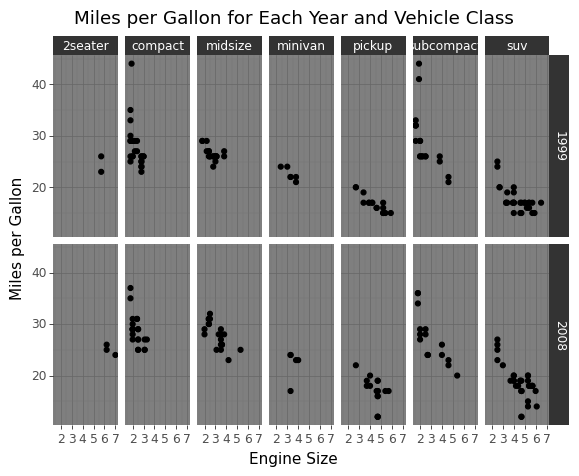

<ggplot: (8775722900673)>

In [30]:
from plotnine.data import mpg
from plotnine import ggplot, aes, facet_grid, labs, geom_point, theme_dark

(
    ggplot(mpg)
    + facet_grid(facets="year~class")
    + aes(x="displ", y="hwy")
    + labs(
        x="Engine Size",
        y="Miles per Gallon",
        title="Miles per Gallon for Each Year and Vehicle Class",
    )
    + geom_point()
    + theme_dark()
)

# Visualizing Multidimensional Data

As an alternative to faceting, you can use colors to represent the value of the third variable. To achieve this, you have to map the engine cylinder count to the x-axis and miles per gallon to the y-axis, then use different colors to represent the vehicle classes

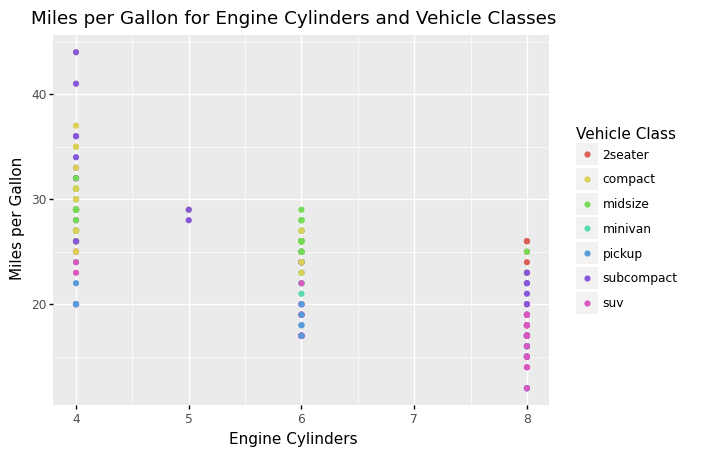

<ggplot: (8775724907877)>

In [31]:
from plotnine.data import mpg
from plotnine import ggplot, aes, labs, geom_point

(
    ggplot(mpg)
    + aes(x="cyl", y="hwy", color="class")
    + labs(
        x="Engine Cylinders",
        y="Miles per Gallon",
        color="Vehicle Class",
        title="Miles per Gallon for Engine Cylinders and Vehicle Classes",
    )
    + geom_point()
)

# Exporting Plots to Files

In [32]:
from plotnine.data import economics
from plotnine import ggplot, aes, geom_line

myPlot = ggplot(economics) + aes(x="date", y="pop") + geom_line()
myPlot.save("myplot.png", dpi=600)

/Users/bartev/.venvs3/stratsync/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/bartev/.venvs3/stratsync/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: myplot.png


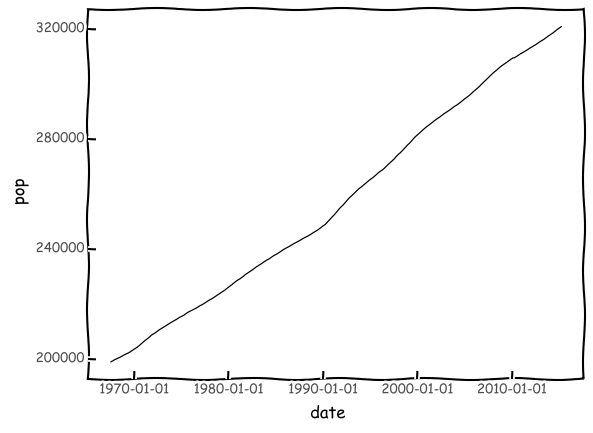

<ggplot: (8775723707573)>

In [33]:
myPlot + theme_xkcd()

# Other

## Size

Size of point in mm

/Users/bartev/.venvs3/stratsync/lib/python3.7/site-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using alpha for a discrete variable is not advised.


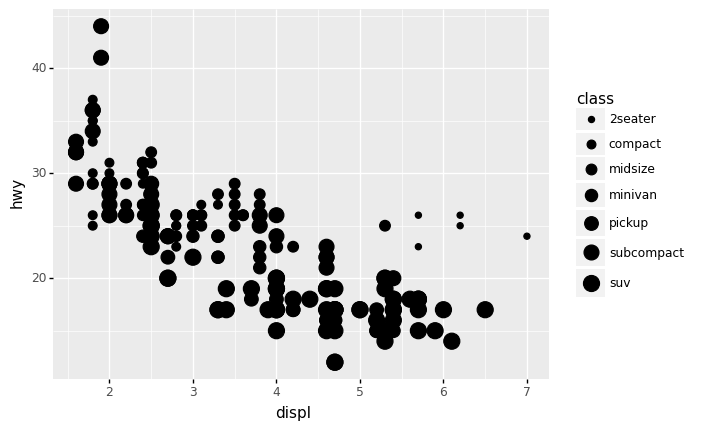

<ggplot: (8775723290385)>

In [34]:
ggplot(data=mpg) + geom_point(mapping=aes(x='displ', y='hwy', size='class'))

## Alpha

/Users/bartev/.venvs3/stratsync/lib/python3.7/site-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using alpha for a discrete variable is not advised.
/Users/bartev/.venvs3/stratsync/lib/python3.7/site-packages/plotnine/scales/scale_alpha.py:70: PlotnineWarning: Using alpha for a discrete variable is not advised.


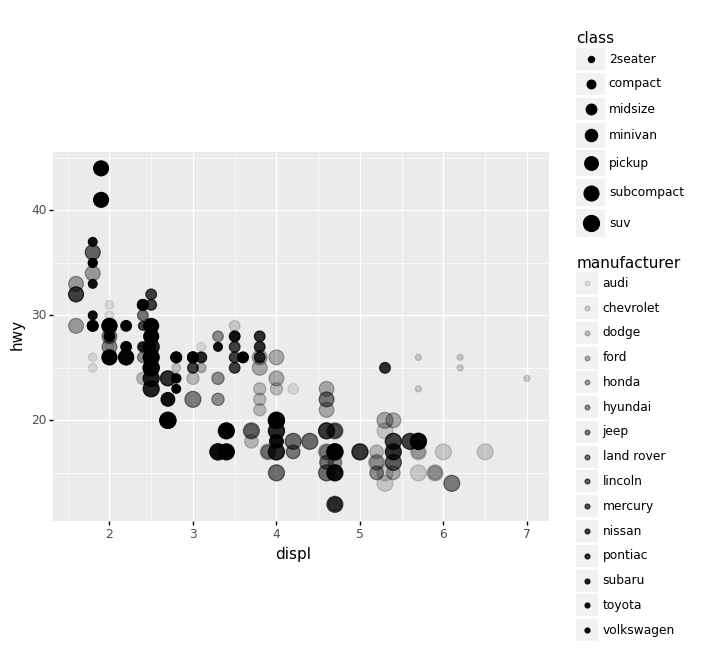

<ggplot: (8775723045977)>

In [35]:
(ggplot(data=mpg) 
 + geom_point(mapping=aes(x='displ', y='hwy', size='class', alpha='manufacturer'))
)

## Shape

See here [https://datascienceworkshops.com/blog/plotnine-grammar-of-graphics-for-python/] for shape mappings

/Users/bartev/.venvs3/stratsync/lib/python3.7/site-packages/plotnine/scales/scale_size.py:50: PlotnineWarning: Using alpha for a discrete variable is not advised.


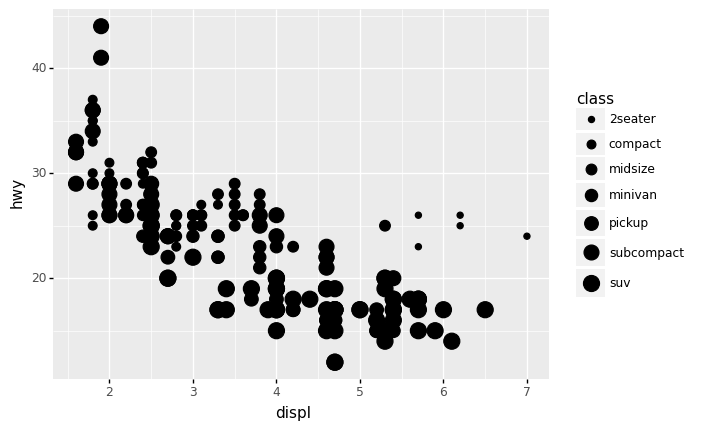

<ggplot: (8775724122209)>

In [36]:
ggplot(data=mpg) + geom_point(mapping=aes(x='displ', y='hwy', size='class'))

## Set aesthetic value outside of `aes()`

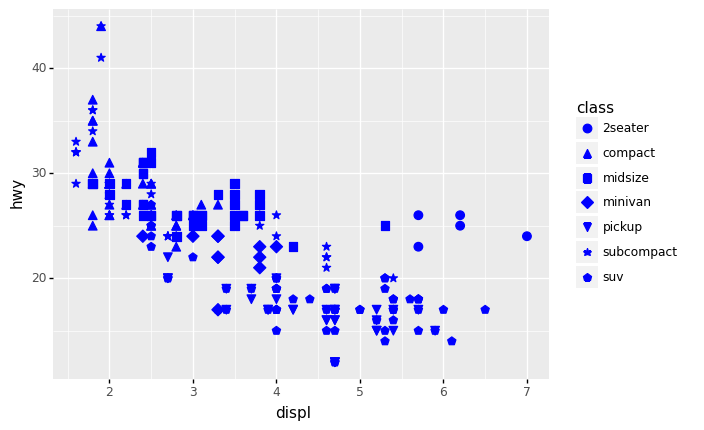

<ggplot: (8775724340413)>

In [37]:
(ggplot(data=mpg) 
 + geom_point(mapping=aes(x='displ', y='hwy', shape='class'), size=3, color='blue')
)

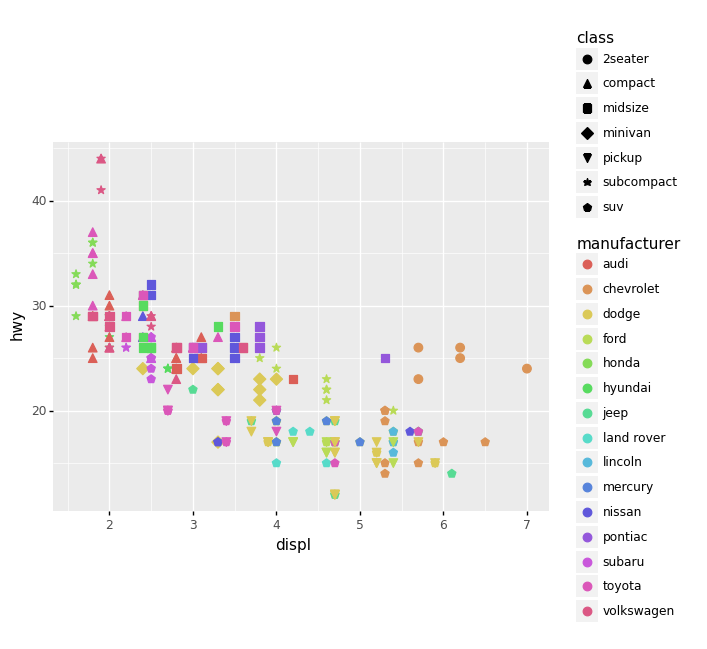

<ggplot: (8775723456709)>

In [38]:
(ggplot(data=mpg) 
 + geom_point(mapping=aes(x='displ', y='hwy', shape='class', color='manufacturer'), size=3)
)

# Learn what `stat` a `geom` uses by inspecting default value for `stat` argument

In [39]:
?geom_bar

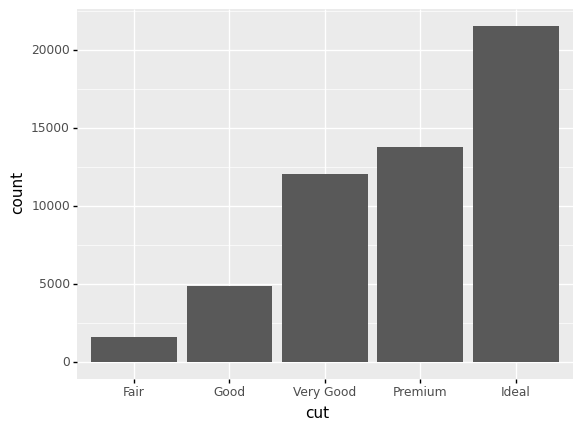

<ggplot: (8775724876069)>

In [40]:
from plotnine.data import diamonds
from plotnine import stat_count

ggplot(data=diamonds) + stat_count(mapping=aes(x='cut'))

/Users/bartev/.venvs3/stratsync/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 38'. Pick better value with 'binwidth'.


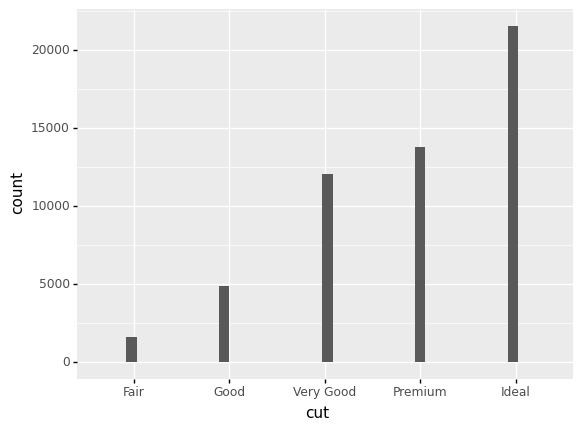

<ggplot: (8775724873201)>

In [41]:
from plotnine.data import diamonds
from plotnine import stat_bin

ggplot(data=diamonds) + stat_bin(mapping=aes(x='cut'))

In [42]:
?stat_bin

# Changing `stat` value

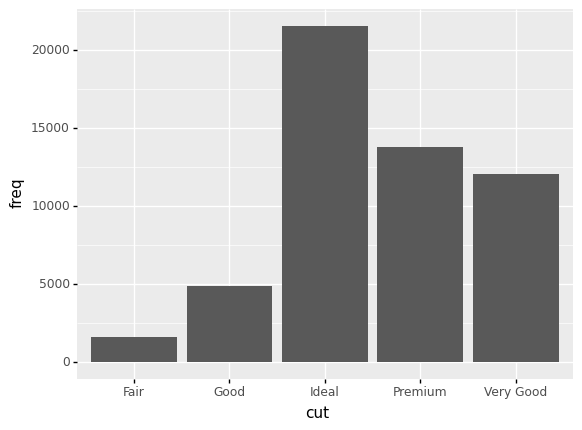

<ggplot: (8775724855237)>

In [43]:
demo = pd.DataFrame({"cut": ["Fair", "Good", "Very Good", "Premium", "Ideal"],
                     "freq": [1610, 4906, 12082, 13791, 21551]})

(ggplot(data=demo) 
 + geom_bar(mapping=aes(x="cut", y="freq"), stat="identity"))

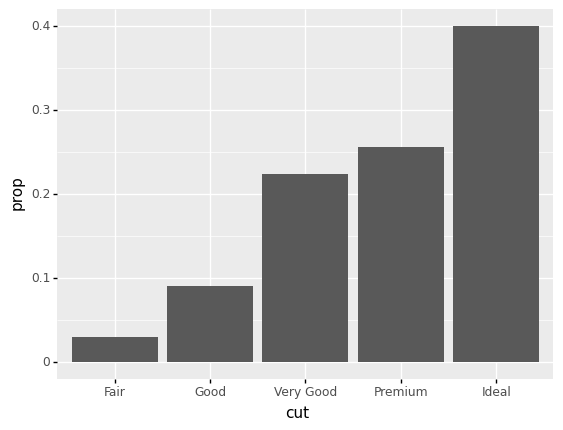

<ggplot: (8775724867393)>

In [44]:
(ggplot(data=diamonds) 
 + geom_bar(mapping=aes(x="cut", y="..prop.."), group=1))

# Position adjustments

## Colour (Bar)

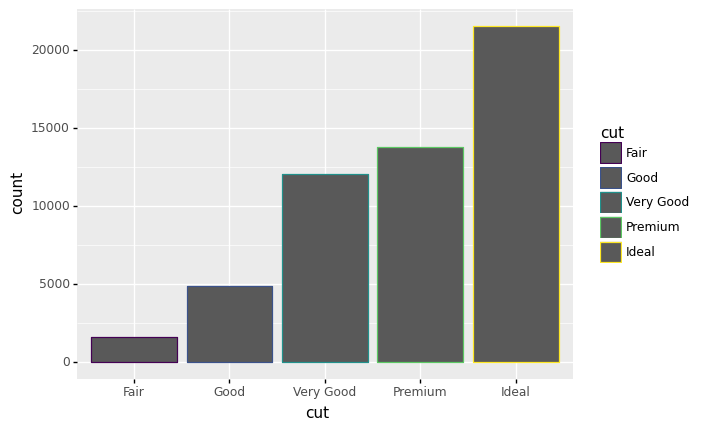

<ggplot: (8775724753721)>

In [45]:
(ggplot(data=diamonds)
  + geom_bar(mapping=aes(x="cut", colour="cut")))


## Fill color (Bar)

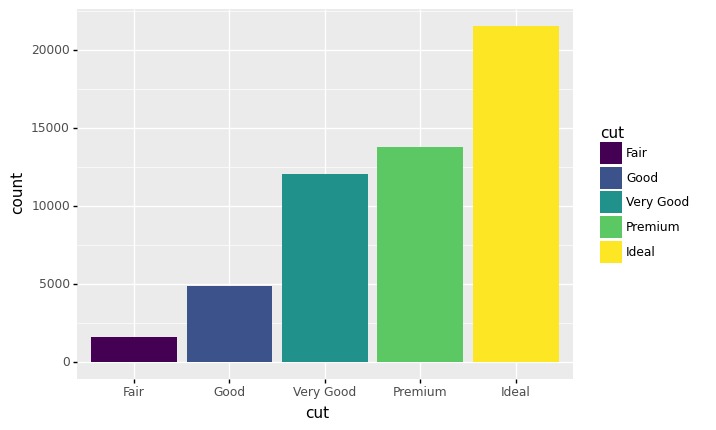

<ggplot: (8775724729277)>

In [46]:
(ggplot(data=diamonds)
  + geom_bar(mapping=aes(x="cut", fill="cut")))


## Stacked bar

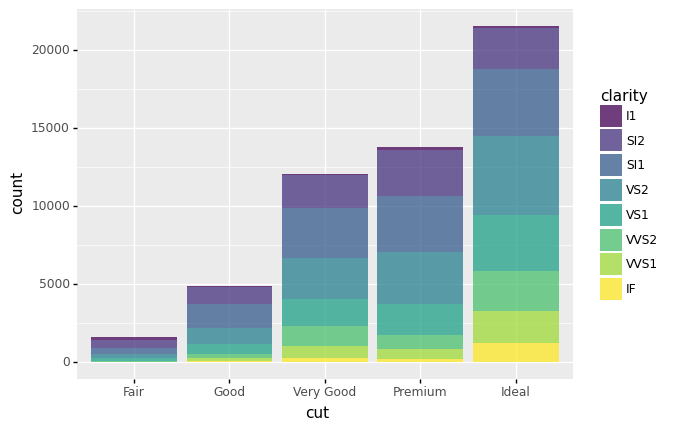

<ggplot: (8775724826613)>

In [47]:
(ggplot(data=diamonds)
  + geom_bar(mapping=aes(x="cut", fill="clarity"), alpha=0.75))


## Bars with `position='identity'` - overlaps bars

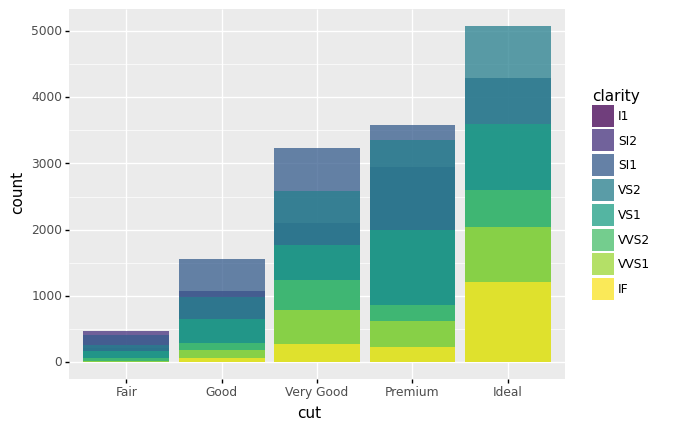

<ggplot: (8775724866993)>

In [48]:
(ggplot(data=diamonds)
  + geom_bar(mapping=aes(x="cut", fill="clarity"), alpha=0.75, position='identity'))


## `geom_bar()` with `position='fill'`

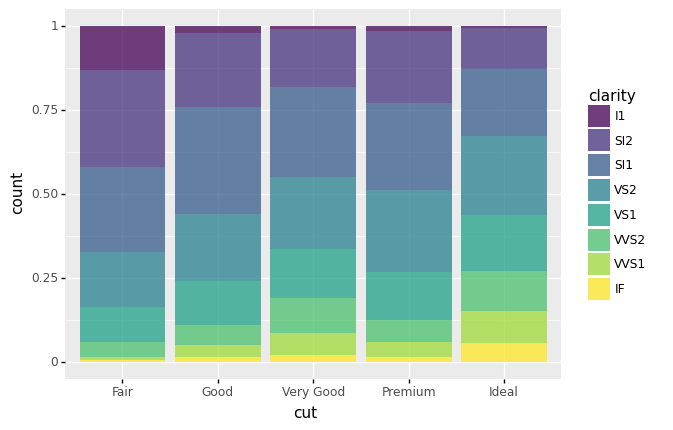

<ggplot: (8775723030489)>

In [49]:
(ggplot(data=diamonds)
  + geom_bar(mapping=aes(x="cut", fill="clarity"), alpha=0.75, position='fill'))


## `geom_bar()` with `position='dodge'`

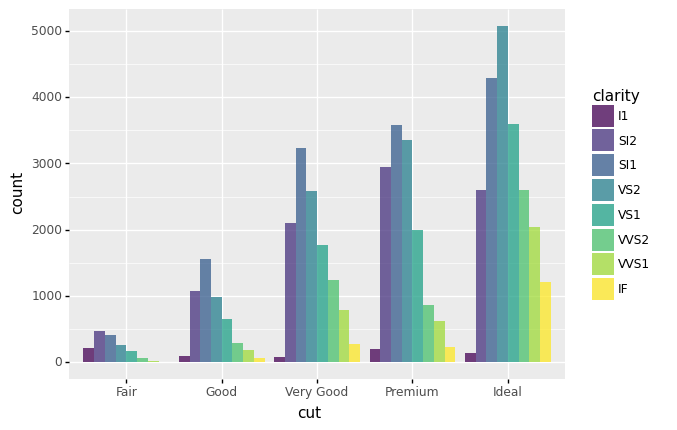

<ggplot: (8775723770605)>

In [50]:
(ggplot(data=diamonds)
  + geom_bar(mapping=aes(x="cut", fill="clarity"), alpha=0.75, position='dodge'))


# Labels

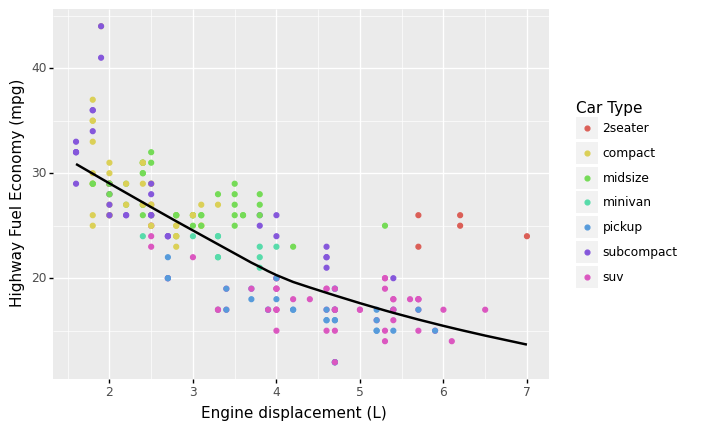

<ggplot: (8775723000745)>

In [51]:
(ggplot(mpg, aes('displ', 'hwy'))
    + geom_point(aes(color='class'))
    + geom_smooth(se=False)
    + labs(x='Engine displacement (L)',
           y='Highway Fuel Economy (mpg)',
           colour='Car Type')
)

## Use equations in labels

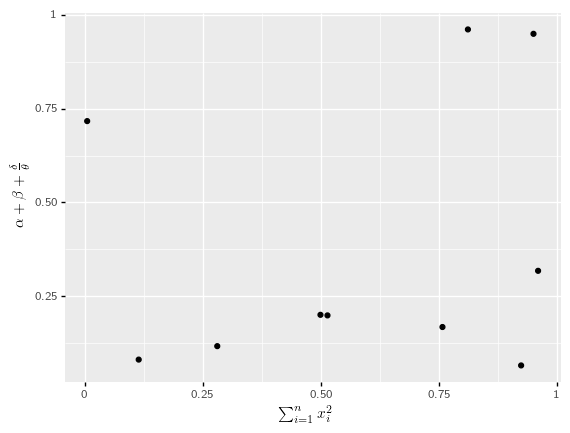

<ggplot: (8775724634445)>

In [52]:
from matplotlib import rc
rc('text', usetex=True)

df = pd.DataFrame({'x': np.random.uniform(size=10),
                   'y': np.random.uniform(size=10)})

(ggplot(df, aes('x', 'y'))
    + geom_point()
    + labs(x='$\\sum_{i=1}^n{x_i^2}$',
           y='$\\alpha + \\beta + \\frac{\\delta}{\\theta}$'))

# Annotations

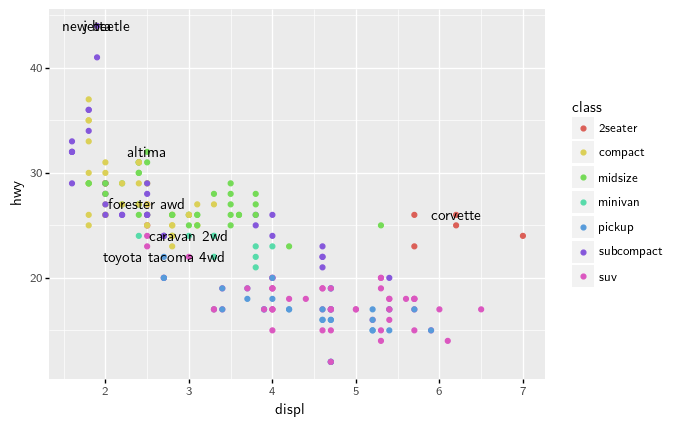

<ggplot: (8775724669533)>

In [53]:
from plotnine import geom_text

best_in_class =(mpg
                .sort_values(by='hwy', ascending=False)
                .groupby('class')
                .first())

(ggplot(mpg, aes('displ', 'hwy'))
    + geom_point(aes(color='class'))
    + geom_text(aes(label='model'), data=best_in_class)
)

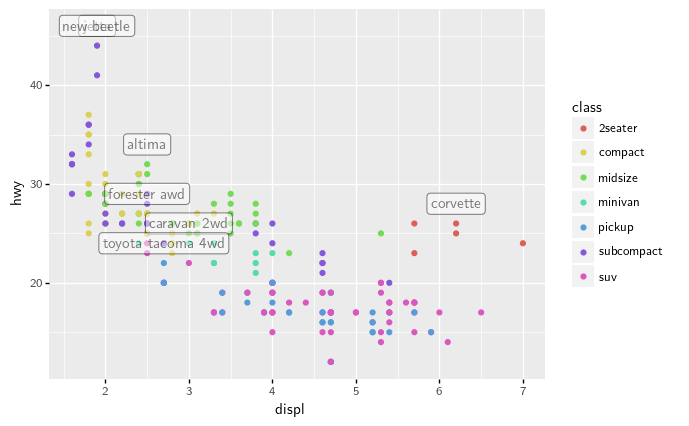

<ggplot: (8775724669661)>

In [54]:
from plotnine import geom_label

best_in_class =(mpg
                .sort_values(by='hwy', ascending=False)
                .groupby('class')
                .first())

(ggplot(mpg, aes('displ', 'hwy'))
    + geom_point(aes(color='class'))
    + geom_label(aes(label='model'), data=best_in_class, nudge_y=2, alpha=0.5)
)

use the `adjust_text` argument. This useful argument, which employs the `adjustText` package under the hood, will automatically adjust labels so that they don’t overlap

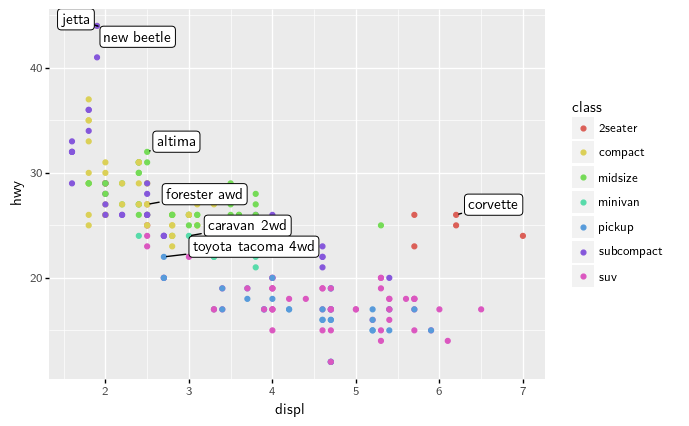

<ggplot: (8775724857025)>

In [56]:
from plotnine import geom_label

best_in_class =(mpg
                .sort_values(by='hwy', ascending=False)
                .groupby('class')
                .first())

(ggplot(mpg, aes('displ', 'hwy'))
    + geom_point(aes(color='class'))
    + geom_label(aes(label='model'), data=best_in_class, 
                adjust_text={'expand_points': (1.5, 1.5),
                             'arrowprops': {'arrowstyle': '-'}})
)

## Note another handy technique used here: I added a second layer of large, hollow points to highlight the points that I’ve labelled

/Users/bartev/.venvs3/stratsync/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


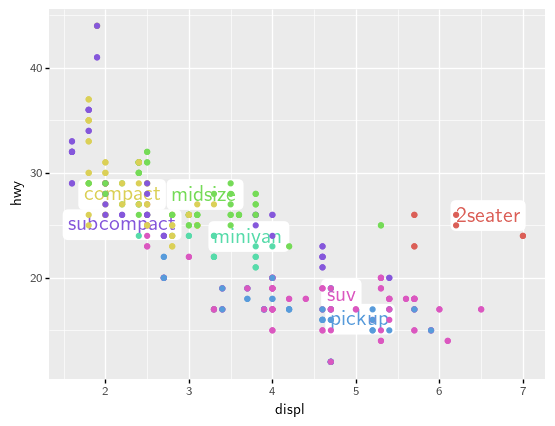

<ggplot: (8775724640857)>

In [65]:
from plotnine import theme

class_avg = (mpg.groupby('class')
                ['displ', 'hwy']
                .median()
                .reset_index())

(ggplot(mpg, aes('displ', 'hwy', color='class'))
    + geom_point()
    + geom_label(aes(label='class'), data=class_avg, size=16, label_size=0, 
                 adjust_text={'expand_points': (0,0)})
    + geom_point()
    + theme(legend_position='none')
    )

## Add a single label to a plot

Often, you want the label in the corner of the plot, so it’s convenient to create a new `DataFrame` using `pd.DataFrame()` and `max()` to compute the maximum values of x and y.



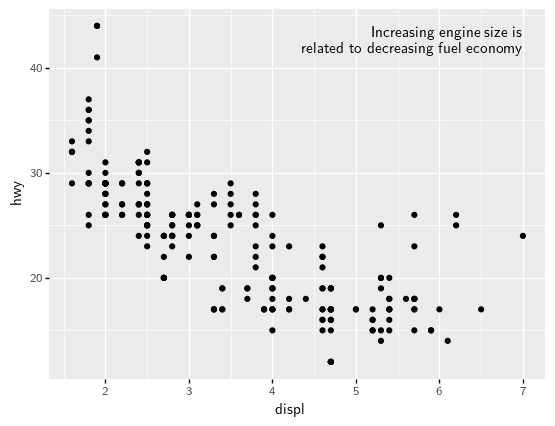

<ggplot: (8775725152545)>

In [68]:
label = pd.DataFrame({'displ': [mpg.displ.max()],
                      'hwy': [mpg.hwy.max()],
                      'label': 'Increasing engine size is\nrelated to decreasing fuel economy'})

(ggplot(mpg, aes('displ', 'hwy'))
    + geom_point()
    + geom_text(aes(label='label'), data=label, va='top', ha='right'))

can use `textwrap` and `fill` to automatically add line breaks

In [69]:
from textwrap import fill

In [73]:
print(fill('Increasing engine size is related to decreasing fuel economy', width=38))

Increasing engine size is related to
decreasing fuel economy


## Other geoms to annotate

* `geom_hline`, `geom_vline`
    * try using `size=2` and `color='white'`
* `geom_rect`
* `geom_segment` with `arrow` argument
    * `x`, `y` define starting location
    * `xend`, `yend` define end location

# The End